**기본 세팅**

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")

---

# 2. PCA(Principal Component Analysis)

**PCA**

PCA는 가장 대표적인 차원 축소 기법중 하나이다.

여러 변수간에 존재하는 상관관계를 이용해 이를 대표하는 주성분(Principal Component)를 추출해 차원을 축소한다.

PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하는데 이것이 PCA의 주성분이 된다.


**선형대수에서의 PCA**

PCA를 선형대수로 해석하면 입력 데이터의 공분산 행렬을 고유값 분해 후 구한 고유벡터에 입력 데이터를 선형 변환하는 것이다.

- 고유벡터는 PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타낸다.


- 고유값은 고유벡터의 크기를 나타내며 동시에 입력 데이터의 분산을 나타낸다.

수식으로 나타내면 다음과 같다.

$$
C =
\begin{bmatrix}
e_{1} & \cdots & e_{n}
\end{bmatrix}
\begin{bmatrix}
\lambda_{1}  & \cdots & 0 \\
\vdots & \cdots & \cdots \\
0 & \cdots &  \lambda_{n} \\
\end{bmatrix}
\begin{bmatrix}
{e_{1}}^{t} \\
\vdots \\
{e_{n}}^{t} \\
\end{bmatrix}
$$

- 공분상 행렬 $C$는 고유벡터 직교행렬 x 고유값 정방행렬 x 고유벡터 직교행렬의 전치행렬로 분해


- $e_{i}$, $\lambda_{i}$는 각각 $i$번째 고유벡터, 해당 고유벡터의 크기를 의미한다.


- $e_{1}$은 가장 분산이 큰 방향을 가진 고유벡터, $e_{2}$는 $e_{1}$에 수직이면서 다음으로 분산이 큰 방향을 가진 고유벡터

**PCA 수행과정**

1. 입력 데이터 세트의 공분산 행렬을 생성한다.


2. 공분산 행렬의 고유벡터와 고유값을 계산한다.


3. 고유값이 가장 큰 순으로 K개(PCA의 변환 차수)만큼 고유벡터를 추출한다.


4. 고유값이 가장 큰 순으로 추출된 고유베터를 이용해 새롭게 입력 데이터를 변환한다.

## 2.1 IRIS 데이터

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

columns = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(data = iris.data, columns = columns)
iris_df["target"] = iris.target

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


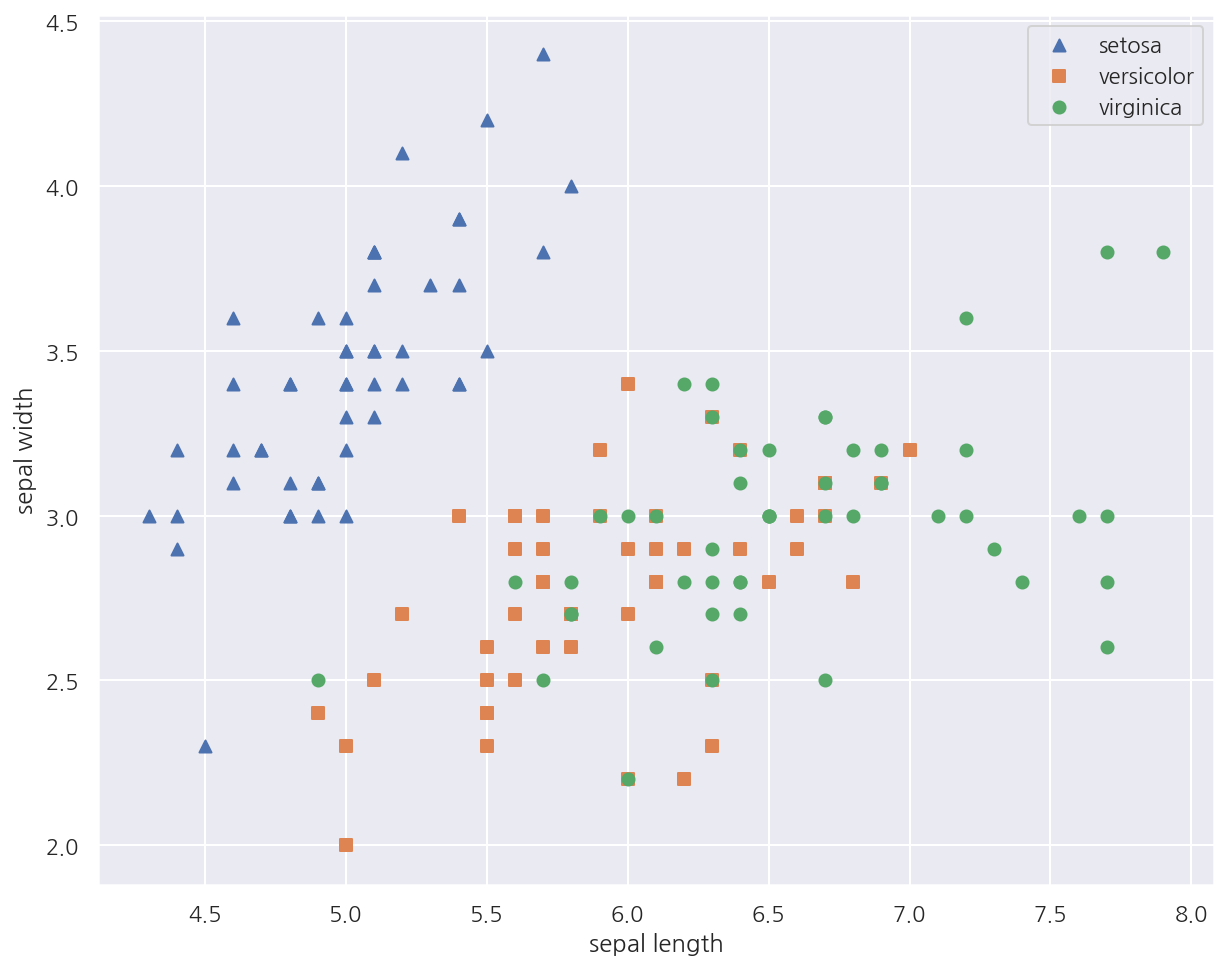

In [4]:
markers = ["^", "s", "o"]

# 0:setosa, 1:versicolor, 2:virginica
for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df['target']==i]['sepal_length']
    y_axis_data = iris_df[iris_df['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

- 일부 피처에 대해 붓꽃 종류를 시각화 하였다.


- setosa의 경우 sepal width가 3이상, sepal length가 6이하인 곳에 대부분 분포되어 있다.


- versicolor, virginica는 sepal width, sepal length만으로는 분류하기 어려워 보인다.

In [5]:
from sklearn.preprocessing import StandardScaler

iris_f_scaled = StandardScaler().fit_transform(iris_df.iloc[:,:-1])

- PCA는 여러 피처 값을 연산하기에 스케일에 영향을 받으므로 PCA 적용 전에 피처 스케일링 작업이 필요하다.


- 여기선 `StandardScaler()`로 표준 정규 분포로 변환하였다.

In [6]:
from sklearn.decomposition import PCA

# 변환할 차원 수 입력
pca = PCA(n_components = 2)

# 스케일 데이터 -> PCA 변환 데이터
pca.fit(iris_f_scaled)
iris_pca = pca.transform(iris_f_scaled)

print(f"스케일 데이터 shape: {iris_f_scaled.shape}")
print(f"PCA 데이터 shape: {iris_pca.shape}")

스케일 데이터 shape: (150, 4)
PCA 데이터 shape: (150, 2)


- PCA를 이용해 기존 4차원(4개 피처)에서 2차원으로 변환 하였다.

In [7]:
# PCA 데이터 프레임 생성
pca_columns=['pca_component_1','pca_component_2']

iris_df_pca = pd.DataFrame(iris_pca, columns = pca_columns)
iris_df_pca['target'] = iris.target

iris_df_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


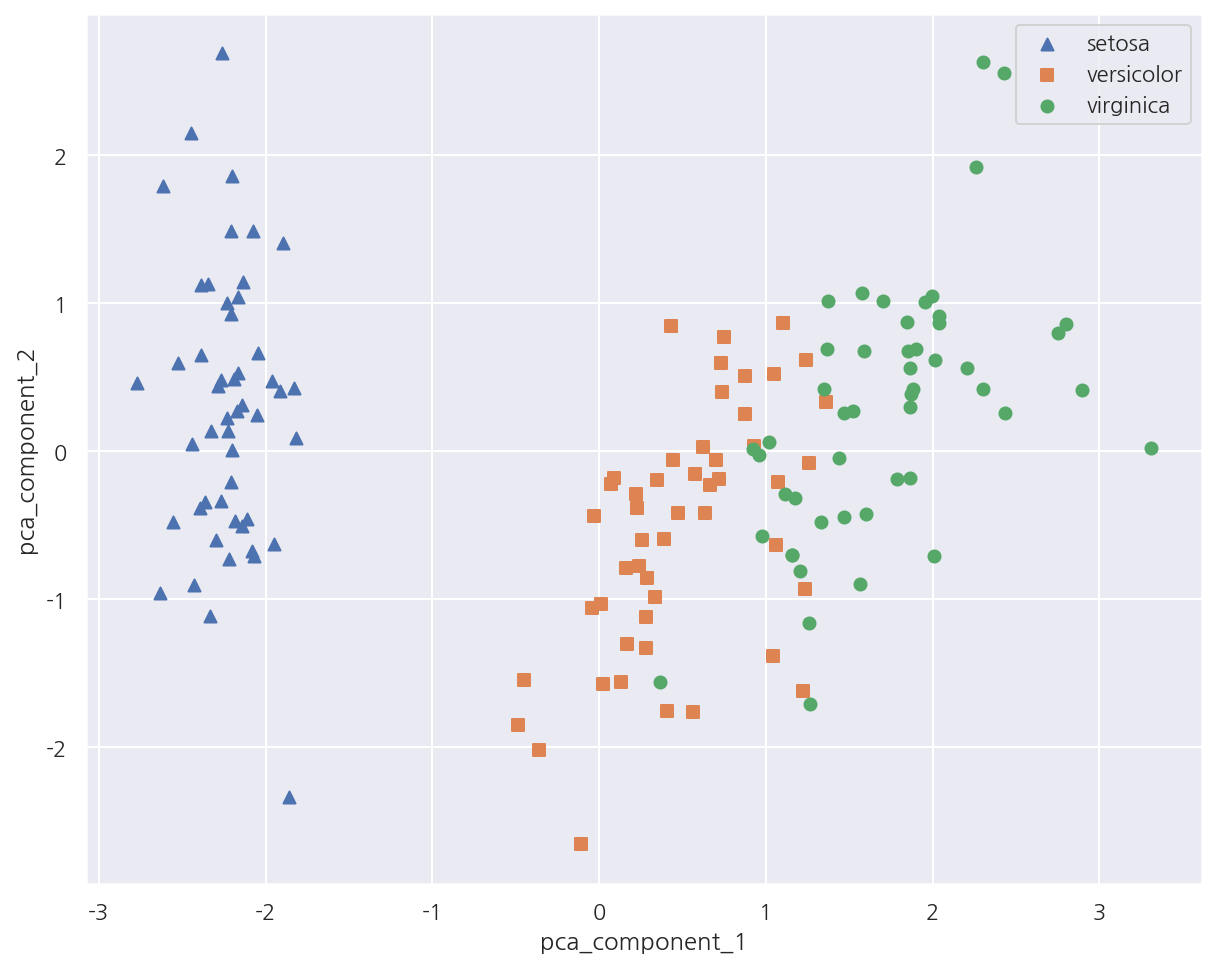

In [8]:
markers = ["^", "s", "o"]

# 0:setosa, 1:versicolor, 2:virginica
for i, marker in enumerate(markers):
    x_axis_data = iris_df_pca[iris_df_pca['target']==i]['pca_component_1']
    y_axis_data = iris_df_pca[iris_df_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

- PCA 변환 후 2개의 속성(피처)로 붓꽃 종류를 시각화 하였다.


- setosa의 경우 pca_component_1 축을 기반으로 명확하게 구분된다.


- versicolor, virginica는 pca_component_1 축을 기반으로 일부 겹치긴 하지만 비교적 잘 구분되었다.


- 이는 pca_component_1이 원본 데이터의 변동성을 잘 반영하였기 때문이다.

In [9]:
# Component 변동성 반영 비율
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


- `explained_variance_ratio_` 속성은 전체 변동성에서 개별 PCA 컴포넌트별가 차지하는 변동성 비율을 제공한다.


- 여기선 pca_component_1이 전체 변동성의 약 72.9%, pca_component_2가 약22.8%를 차지한다.


- 즉, PCA를 2개 요소로만 변환해도 원본 데이터 변동성의 약95%를 설명할 수 있다.

## 2.2 PCA 변환 전/후 분류

**PCA 변환 전 성능**

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 분류 모델: 랜덤 포레스트
rcf = RandomForestClassifier(random_state=1017)

# 교차 검증
scores = cross_val_score(rcf, iris_df.iloc[:,:-1], iris_df.target, scoring = "accuracy", cv = 3)

print(f"원본 데이터 fold별 정확도: {scores}")
print(f"원본 데이터 평균 정확도: {np.mean(scores):.4f}")

원본 데이터 fold별 정확도: [0.98 0.94 0.92]
원본 데이터 평균 정확도: 0.9467


**PCA 변환 후 성능**

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 분류 모델: 랜덤 포레스트
rcf = RandomForestClassifier(random_state=1017)

# 교차 검증
pca_scores = cross_val_score(rcf, iris_df_pca.iloc[:,:-1], iris_df_pca.target, scoring = "accuracy", cv = 3)

print(f"PCA 데이터 fold별 정확도: {pca_scores}")
print(f"PCA 데이터 평균 정확도: {np.mean(pca_scores):.4f}")

PCA 데이터 fold별 정확도: [0.88 0.88 0.88]
PCA 데이터 평균 정확도: 0.8800


- PCA 변환 후에는 원본에 비해 속성(피처)이 줄어들기에 예측 성능은 감소될 수 밖에 없다.


- 정확도가 대략 6%가량 하락하여 비교적 큰 수치로 감소하였다. 


- 하지만 속성(피처)이 4개에서 2개로 50% 감소한 것을 고려하면 PCA 변환 후에도 원본 데이터의 특성을 상당 부분 유지하고 있음을 알 수 있다.

## 2.3 UCI 신용카드 고객 데이터

이번엔 피처의 수가 더 많은 데이터를 이용해 PCA를 적용하기 위해 UCI 신용카드 고객 데이터를 사용한다.

데이터는 [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)에서 다운받을 수 있다.

In [12]:
# 첫 행 제거, ID 제거
df = pd.read_excel("./credit_card.xls", header=1, sheet_name="Data").drop("ID", axis=1)

print(df.shape)
df.head()

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


- 필요 없는 ID 제거 후 데이터는 30,000 x 24로 이루어져있다.


- target은 default payment next month으로 다음달 연체 여부를 의미하며 0은 정상납부, 1은 연체를 의미한다.


- PAY_0 다음에 PAY_2가 나와 있어 PAY_0를 PAY_1으로 변경하고 target의 컬럼명도 default로 변경하자.

In [13]:
# 컬럼명 변경
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)

X_features = df.drop('default', axis=1)
y_target = df['default']

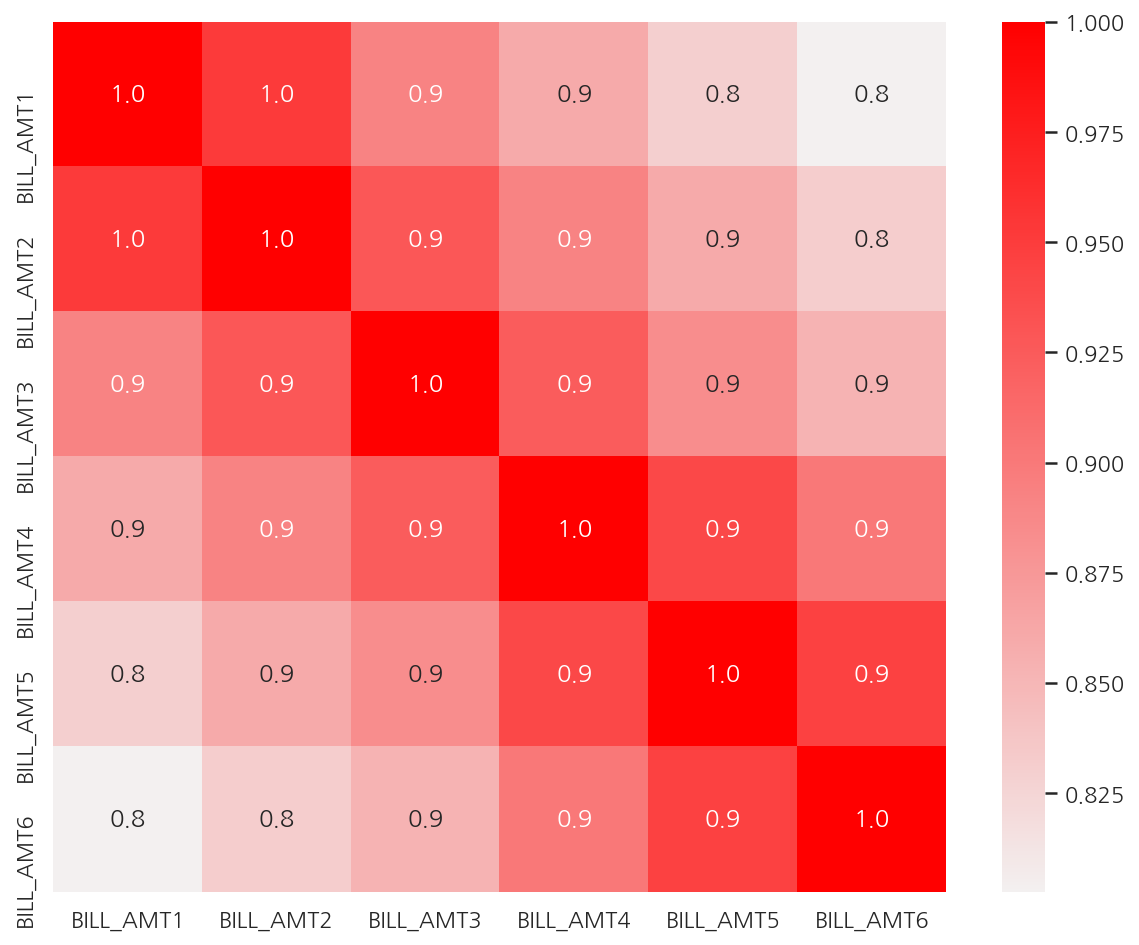

In [14]:
# 컬럼 BILL_AMT1 ~ BILL_AMT6
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]

# 피처 상관관계
# corr = X_features.corr()
corr = X_features[cols_bill].corr()

sns.heatmap(corr, 
            cmap = sns.light_palette("red", as_cmap=True), 
            annot=True, 
            fmt='.1f')

plt.show()

- 피처 간 상관관계를 확인하였을 때 BILL_AMT1 ~ BILL_AMT6 간의 상관계수가 0.8 ~ 1.0으로 매우 높다.


- 여기선 전체 상관관계를 확인하고 피처 간 상관계수가 높은 피처에 대해서만 시각화 하였다.


- 전체를 보고 싶다면 주석 코드를 실행하자.

In [15]:
# 피처 스케일링 
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])

# PCA: n = 2
pca = PCA(n_components=2)
pca.fit(df_cols_scaled) 

print('PCA Component별 변동성:', pca.explained_variance_ratio_)

PCA Component별 변동성: [0.90555253 0.0509867 ]


- 앞서 상관계수가 높은 피처 BILL_AMT1 ~ BILL_AMT6을 스케일링 후 PCA 변환하였다.


- 2개의 PCA 컴포넌트만으로 6개 속성의 변동성을 약 95% 설명 가능하다.


- 특히 첫 번째 PCA 축으로 90%의 변동성을 설명할 정도로 기존 6개 속성의 상관도가 매우 높다.

**PCA 변환 전 성능**

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 분류 모델: 랜덤 포레스트
rcf = RandomForestClassifier(n_estimators=300, random_state=1017)

# 교차 검증
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print(f"원본 데이터 fold별 정확도: {scores}")
print(f"원본 데이터 평균 정확도: {np.mean(scores):.4f}")

원본 데이터 fold별 정확도: [0.8082 0.8217 0.8223]
원본 데이터 평균 정확도: 0.8174


In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 피처 스케일링
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# PCA: n = 6
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)

# 분류 모델: 랜덤 포레스트
rcf = RandomForestClassifier(n_estimators=300, random_state=1017)

# 교차 검증
pca_scores = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print(f"PCA 데이터 fold별 정확도: {pca_scores}")
print(f"PCA 데이터 평균 정확도: {np.mean(pca_scores):.4f}")

PCA 데이터 fold별 정확도: [0.792  0.7976 0.8036]
PCA 데이터 평균 정확도: 0.7977


- PCA 변환 전 23개의 속성에서 약 25% 수준인 6개의 PCA 컴포넌트로 예측하였음에도 정확도는 약 2%만 감소하였다.


- 2% 감소가 작은 것은 아니지만 전체 속성의 25%만으로도 이정도 예측 성능을 유지하는 것은 PCA의 압축 능력을 잘 보여준다.